In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wcm = pd.read_csv('data/WorldCupMatches_complete.csv',header=0, index_col='Unnamed: 0')
display(df_wcm)

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Match Winner
0,1930.0,France,4.0,1.0,Mexico,,4444.0,France
1,1930.0,USA,3.0,0.0,Belgium,,18346.0,USA
2,1930.0,Yugoslavia,2.0,1.0,Brazil,,24059.0,Yugoslavia
3,1930.0,Romania,3.0,1.0,Peru,,2549.0,Romania
4,1930.0,Argentina,1.0,0.0,France,,23409.0,Argentina
...,...,...,...,...,...,...,...,...
975,2022.0,England,1.0,2.0,France,,68895.0,France
976,2022.0,Argentina,3.0,0.0,Croatia,,88966.0,Argentina
977,2022.0,France,2.0,0.0,Morocco,,68294.0,France
978,2022.0,Croatia,2.0,1.0,Morocco,,44137.0,Croatia


### Organize the information to use for our Prediction Method
We will create a data frame with the goals scored by each team per year. A NaN value means that, in that year, the team did not participate in world cup. A value of zero means that, in that year, the team participated but did not score any goal.

In [3]:
years = []
for i in range(0, len(df_wcm['Year'])):
    if i==0:
        years.append(df_wcm['Year'][i])
    elif df_wcm['Year'][i]!=df_wcm['Year'][i-1]:
        years.append(df_wcm['Year'][i])
    
df = pd.DataFrame(years, columns=['World Cup Year'])

In [4]:
#Create a dictionary with the goals per country, for each year of World Cup
geral_dict = {}

for i in years:

    home_teams = df_wcm['Home Team Name'].to_list()
    away_teams = df_wcm['Away Team Name'].to_list()
    teams = []
    for h in home_teams:
        for a in away_teams:
            if h==a:
                teams.append(h)
            else:
                teams.append(a)
    
    na = dict.fromkeys(teams, 0) #initialize the dictionary with all values to zero
   
    team=[]
       
    for k in range(0,len(df_wcm['Home Team Name'])):
        if df_wcm['Year'][k]==i:
            for j in na:
                if df_wcm['Home Team Name'][k]==j:
                    na[j]=na[j]+df_wcm['Home Team Goals'][k]
                    team.append(df_wcm['Home Team Name'][k])
                elif df_wcm['Away Team Name'][k]==j:
                    na[j]=na[j]+df_wcm['Away Team Goals'][k]
                    team.append(df_wcm['Away Team Name'][k])
   
    notteam=[]
    for j in na:
        aux=0
        for l in team:
            if l==j:
               
                aux=1   #the team played in that year world cup
        if aux==0:      #the team didn't play in that year world cup
            na[j]=np.nan
   
    geral_dict[i]=na

In [5]:
na = dict.fromkeys(teams, 0)

for k in na:
    a=[]
    for i in geral_dict:
        for j in geral_dict[i]:
            if j==k:
                a.append(geral_dict[i][j])
    df[str(k)]=a

In [6]:
df['World Cup Year']=df['World Cup Year'].astype(int)
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Method 
Cummulative sum with weights associated based on goals scored per year. The weights will be choosen as having a great influence as more recent they are; that means, goals scored in recent world cup years will have more impact in our prediciton.

Choice 1 of weights

In [7]:
n = len(df['World Cup Year'])-1 #to not count the last year (2022), the year we will make the prediction
weights1 = []

for i in range(1, len(df)):
    weights1.append(i/n)


Text(0.5, 1.0, 'Weights 1 for goals scored per cup')

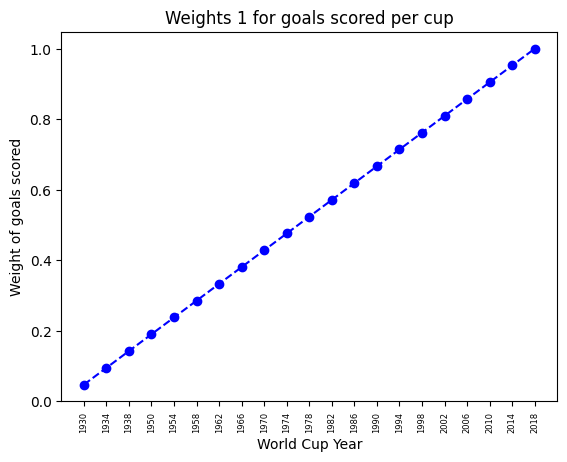

In [8]:
x = []
for i in range(0, len(df['World Cup Year'])-1):
    x.append(str(df['World Cup Year'][i]))

plt.plot(x,weights1, linestyle='--', marker='o', color='b')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights 1 for goals scored per cup')

In [9]:
#check if a team qualified in World Cup 2022
teams_22 = []
for i in range(1, len(df.columns)):
    if np.isnan(df[df.columns[i]][21])==False:
        teams_22.append(df.columns[i])
        

In [10]:
#apply the weights to the goals values of each team that qualified in World Cup 2022

y = ["Method1"]

for i in range(1, len(df.columns)):
    idx = 0
    for j in teams_22:
        if df.columns[i]==j:
            pred = 0
            idx = 1 #team participated
            for w in range(0, len(weights1)):
                if np.isnan(df[df.columns[i]][w])==True:
                    pred=pred
                else:
                    pred+=weights1[w]*(df[df.columns[i]][w])
            y.append(round(pred,1))
            
    if idx==0: #team did not participate
        y.append(np.nan)
        
                    

In [11]:
df.loc[len(df)]=y
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choice 2 of weights 

In [12]:
n = len(df['World Cup Year'])-2 #to not count the last year (2022), the year we will make the prediction
weights2 = []

for i in range(1, len(df)-1):
    weights2.append((i**(i/n))/n)

Text(0.5, 1.0, 'Weights 2 for goals scored per cup')

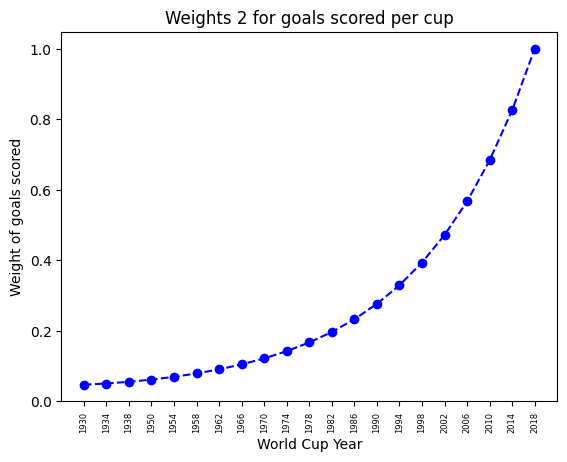

In [13]:
x = []
for i in range(0, len(df['World Cup Year'])-2):
    x.append(str(df['World Cup Year'][i]))

plt.plot(x,weights2, linestyle='--', marker='o', color='b')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights 2 for goals scored per cup')

In [14]:
#apply the weights to the goals values of each team that qualified in World Cup 2022

y = ["Method2"]

for i in range(1, len(df.columns)):
    idx = 0
    for j in teams_22:
        if df.columns[i]==j:
            pred = 0
            idx = 1 #team participated
            for w in range(0, len(weights2)):
                if np.isnan(df[df.columns[i]][w])==True:
                    pred=pred
                else:
                    pred+=weights2[w]*(df[df.columns[i]][w])
            y.append(round(pred,1))
            
    if idx==0: #team did not participate
        y.append(np.nan)

In [15]:
df.loc[len(df)]=y
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choice 3 of weights

In [16]:
import math

n = len(df['World Cup Year'])-3 #to not count the last year (2022), the year we will make the prediction
weights3 = []

for i in weights2:
    weights3.append(1-i)
    
weights3.sort()

Text(0.5, 1.0, 'Weights 3 for goals scored per cup')

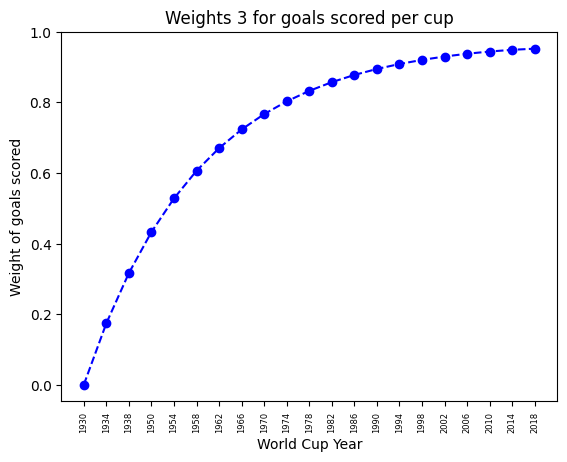

In [17]:
x = []
for i in range(0, len(df['World Cup Year'])-3):
    x.append(str(df['World Cup Year'][i]))

plt.plot(x,weights3, linestyle='--', marker='o', color='b')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights 3 for goals scored per cup')

In [18]:
#apply the weights to the goals values of each team that qualified in World Cup 2022

y = ["Method3"]

for i in range(1, len(df.columns)):
    idx = 0
    for j in teams_22:
        if df.columns[i]==j:
            pred = 0
            idx = 1 #team participated
            for w in range(0, len(weights3)):
                if np.isnan(df[df.columns[i]][w])==True:
                    pred=pred
                else:
                    pred+=weights3[w]*(df[df.columns[i]][w])
            y.append(round(pred,1))
            
    if idx==0: #team did not participate
        y.append(np.nan)

In [19]:
df.loc[len(df)]=y
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choice 4 of Weights

In [20]:
import math

n = len(df['World Cup Year'])-4 #to not count the last year (2022), the year we will make the prediction
weights4 = []

for i in range(1, len(df)-3):
    weights4.append(1-math.exp(-(i/n)*i))

Text(0.5, 1.0, 'Weights 4 for goals scored per cup')

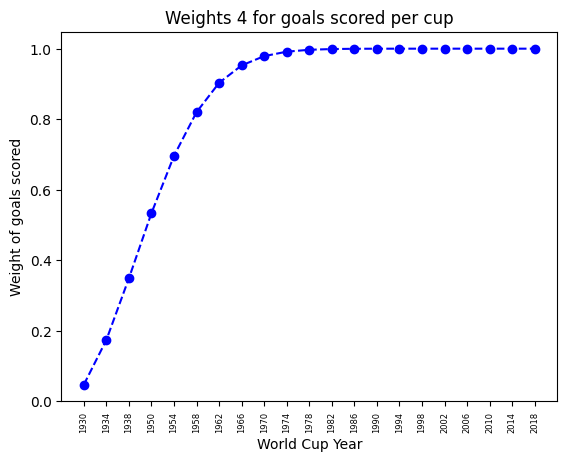

In [21]:
x = []
for i in range(0, len(df['World Cup Year'])-4):
    x.append(str(df['World Cup Year'][i]))

plt.plot(x,weights4, linestyle='--', marker='o', color='b')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights 4 for goals scored per cup')

In [22]:
#apply the weights to the goals values of each team that qualified in World Cup 2022

y = ["Method4"]

for i in range(1, len(df.columns)):
    idx = 0
    for j in teams_22:
        if df.columns[i]==j:
            pred = 0
            idx = 1 #team participated
            for w in range(0, len(weights4)):
                if np.isnan(df[df.columns[i]][w])==True:
                    pred=pred
                else:
                    pred+=weights4[w]*(df[df.columns[i]][w])
            y.append(round(pred,1))
            
    if idx==0: #team did not participate
        y.append(np.nan)

In [23]:
df.loc[len(df)]=y
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Choice 5 of Weights

In [24]:
n = len(df['World Cup Year'])-5 #to not count the last year (2022), the year we will make the prediction
weights5 = []

for i in range(1, len(df)-4):
    weights5.append(i**(2*i/n)/n/24)

Text(0.5, 1.0, 'Weights 5 for goals scored per cup')

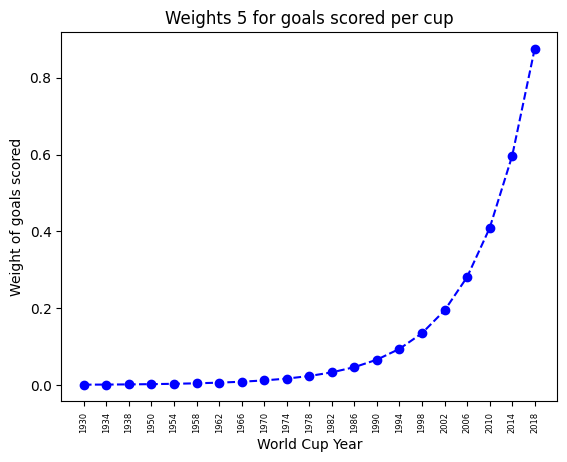

In [25]:
x = []
for i in range(0, len(df['World Cup Year'])-5):
    x.append(str(df['World Cup Year'][i]))

plt.plot(x,weights5, linestyle='--', marker='o', color='b')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights 5 for goals scored per cup')

In [26]:
#apply the weights to the goals values of each team that qualified in World Cup 2022

y = ["Method5"]

for i in range(1, len(df.columns)):
    idx = 0
    for j in teams_22:
        if df.columns[i]==j:
            pred = 0
            idx = 1 #team participated
            for w in range(0, len(weights5)):
                if np.isnan(df[df.columns[i]][w])==True:
                    pred=pred
                else:
                    pred+=weights5[w]*(df[df.columns[i]][w])
            y.append(round(pred,1))
            
    if idx==0: #team did not participate
        y.append(np.nan)

In [27]:
df.loc[len(df)]=y
display(df)

,World Cup Year,Mexico,Belgium,Brazil,Peru,France,Bolivia,Paraguay,Romania,Chile,...,Ukraine,Trinidad and Tobago,Serbia and Montenegro,Angola,Slovakia,Serbia,Bosnia and Herzegovina,Iceland,Panama,Qatar
0,1930,4.0,0.0,5.0,1.0,4.0,0.0,1.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1934,NaN,2.0,1.0,NaN,2.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1938,NaN,1.0,14.0,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1950,2.0,NaN,22.0,NaN,NaN,0.0,2.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,2.0,5.0,8.0,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1958,1.0,NaN,16.0,NaN,23.0,NaN,9.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1962,3.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1966,1.0,NaN,4.0,NaN,2.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1970,6.0,4.0,19.0,9.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1974,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


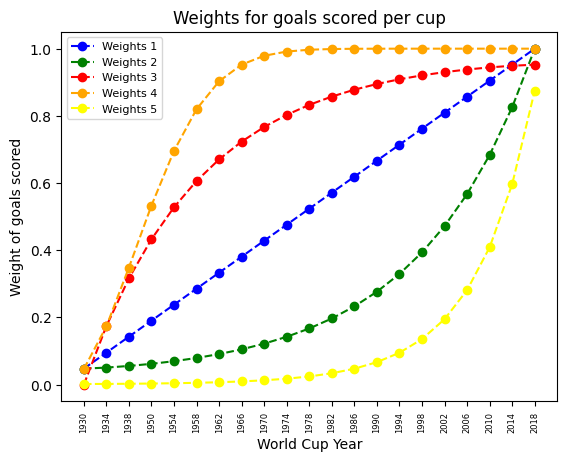

In [28]:
plt.plot(x,weights1, linestyle='--', marker='o', color='b')
plt.plot(x,weights2, linestyle='--', marker='o', color='g')
plt.plot(x,weights3, linestyle='--', marker='o', color='r')
plt.plot(x,weights4, linestyle='--', marker='o', color='orange')
plt.plot(x,weights5, linestyle='--', marker='o', color='yellow')
plt.xticks(fontsize=6, rotation=90)
plt.xlabel('World Cup Year')
plt.ylabel('Weight of goals scored')
plt.title('Weights for goals scored per cup')
plt.legend(["Weights 1", "Weights 2", "Weights 3", "Weights 4", "Weights 5"], fontsize=8)

Find the Country with the highest value of the cummulative sum for the 5 scenarios:

In [31]:
max = 0
d = df.columns
d = d.drop("World Cup Year")

for i in range(22,27):
    max = 0
    for j in d:
        if df[j][i] > max:
            max = df[j][i]
            country = j
    print(country)

Germany
Germany
Germany
Germany
Germany


It does not match with the real winner neither with the predicted winner because having more goals does not really mean win a World Cup (while mean win a match) but it is what has more influence.